# Machine Learning Classification Model

In [27]:
???

Object `?` not found.


## Load the data

In [28]:
import pandas as pd

df = pd.read_excel('data/MSFT_preprocessed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800,1.549141,UP
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400,0.321694,UP
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100,1.286125,UP
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900,-0.478620,DOWN
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700,-0.159793,DOWN
...,...,...,...,...,...,...,...
2024-06-21,447.380005,450.579987,446.510010,449.779999,34486200,-0.471326,DOWN
2024-06-24,449.799988,452.750000,446.410004,447.670013,15913700,0.727353,UP
2024-06-25,448.250000,451.420013,446.750000,450.950012,16747500,0.267602,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [29]:
target = df.change_tomorrow_direction
target2 =df.change_tomorrow_direction

explanatory = df.drop(columns=['change_tomorrow','change_tomorrow_direction'])
explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,61.299999,61.580002,60.840000,61.009998,21220800
2016-12-09,61.180000,61.990002,61.130001,61.970001,27349400
2016-12-12,61.820000,62.299999,61.720001,62.169998,20198100
2016-12-13,62.500000,63.419998,62.240002,62.980000,35718900
2016-12-14,63.000000,63.450001,62.529999,62.680000,30352700
...,...,...,...,...,...
2024-06-21,447.380005,450.579987,446.510010,449.779999,34486200
2024-06-24,449.799988,452.750000,446.410004,447.670013,15913700
2024-06-25,448.250000,451.420013,446.750000,450.950012,16747500


### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [30]:
from sklearn.tree import DecisionTreeClassifier #Classifier coz we wanna predict a category of up and down
model_dt = DecisionTreeClassifier(max_depth=15) #max_depth will limit the decision tree depth 
model_dt.fit(X=explanatory,y=target)






DecisionTreeClassifier(max_depth=15)

### Visualize the model

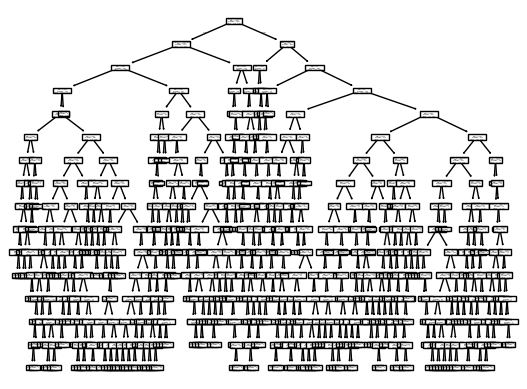

In [31]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);


### Calculate the predictions

In [32]:


y_pred = model_dt.predict(X=explanatory)
df_predictions = df[['change_tomorrow_direction']].copy()


df_predictions['pred'] = y_pred

In [33]:

df_predictions

,change_tomorrow_direction,pred
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
2016-12-12,UP,UP
2016-12-13,DOWN,DOWN
2016-12-14,DOWN,DOWN
...,...,...
2024-06-21,DOWN,DOWN
2024-06-24,UP,DOWN
2024-06-25,UP,DOWN


### Evaluate the model: compare predictions with the reality

In [34]:
comp = df_predictions['change_tomorrow_direction'] == df_predictions['pred']

#[comp.value_counts(),comp14.value_counts()]
accuracy = comp.sum()/len(comp)

[accuracy]

[0.8572933122696156]

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [35]:
import os
import pickle
#os.makedirs('models') 
model_dt

DecisionTreeClassifier(max_depth=15)

In [36]:
with open('models/model_dt_classificationA.pkl', 'wb') as f:
    pickle.dump(model_dt, f)